<a href="https://colab.research.google.com/github/grayhacked/AI/blob/main/TS_ML_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting using ML

Data used: information about onion sales in India.

Goal: predict the sold quantity for Bangalore city.

The data file can be found in the [shared folder](https://drive.google.com/drive/folders/1K7XQBaG4VoYmNdoLZx4bDLXMwWJOwd6S?usp=sharing).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Data preprocessing

In [3]:
data_path = '/content/drive/MyDrive/Copy of monthly_market_arrivals.csv'

In [20]:
data = pd.read_csv(data_path)

# Sort data and define index based on the date column
data.date = pd.DatetimeIndex(data.date)
data = data.sort_values(by="date")
data.index = pd.PeriodIndex(data.date, freq="M")

data.head()
data.tail()

#filter where city equal Bangalore
data = data[data['city'] == 'BANGALORE']
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [7]:
data.dtypes

,0
market,object
month,object
year,int64
quantity,int64
priceMin,int64
priceMax,int64
priceMod,int64
state,object
city,object
date,datetime64[ns]


Keep only target variable (`quantity`) for Bangalore city.

1.   List item
2.   List item



In [23]:
# your code here
#Keep only target variable (quantity) for Bangalore city.
T_data = data[data['city'] == 'BANGALORE'][['quantity']]
T_data.head()


,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


Plot the time series data.

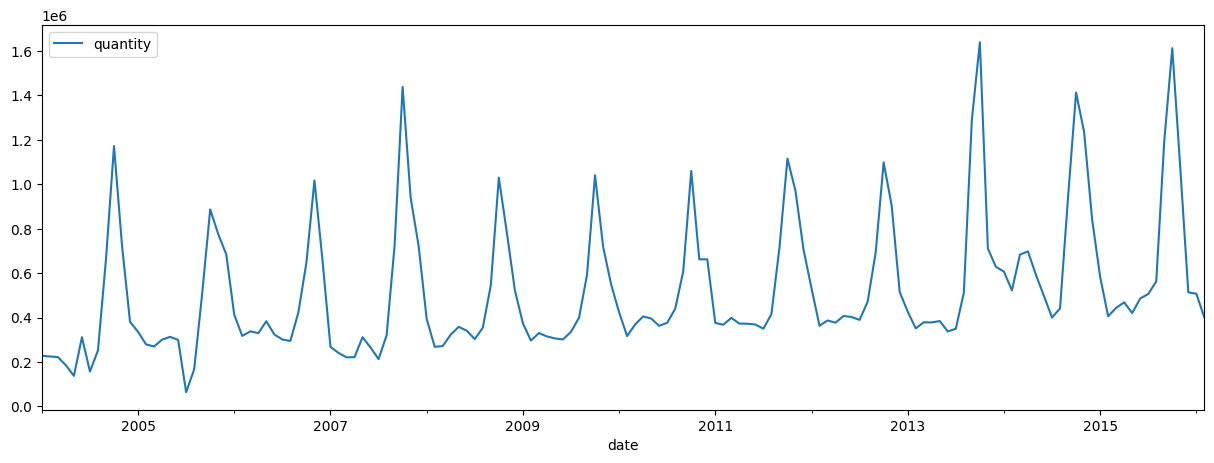

In [24]:
# your code here
T_data.plot(figsize=(15,5))
plt.show()

## Components of a time series

Plot the components of the quantity time series.

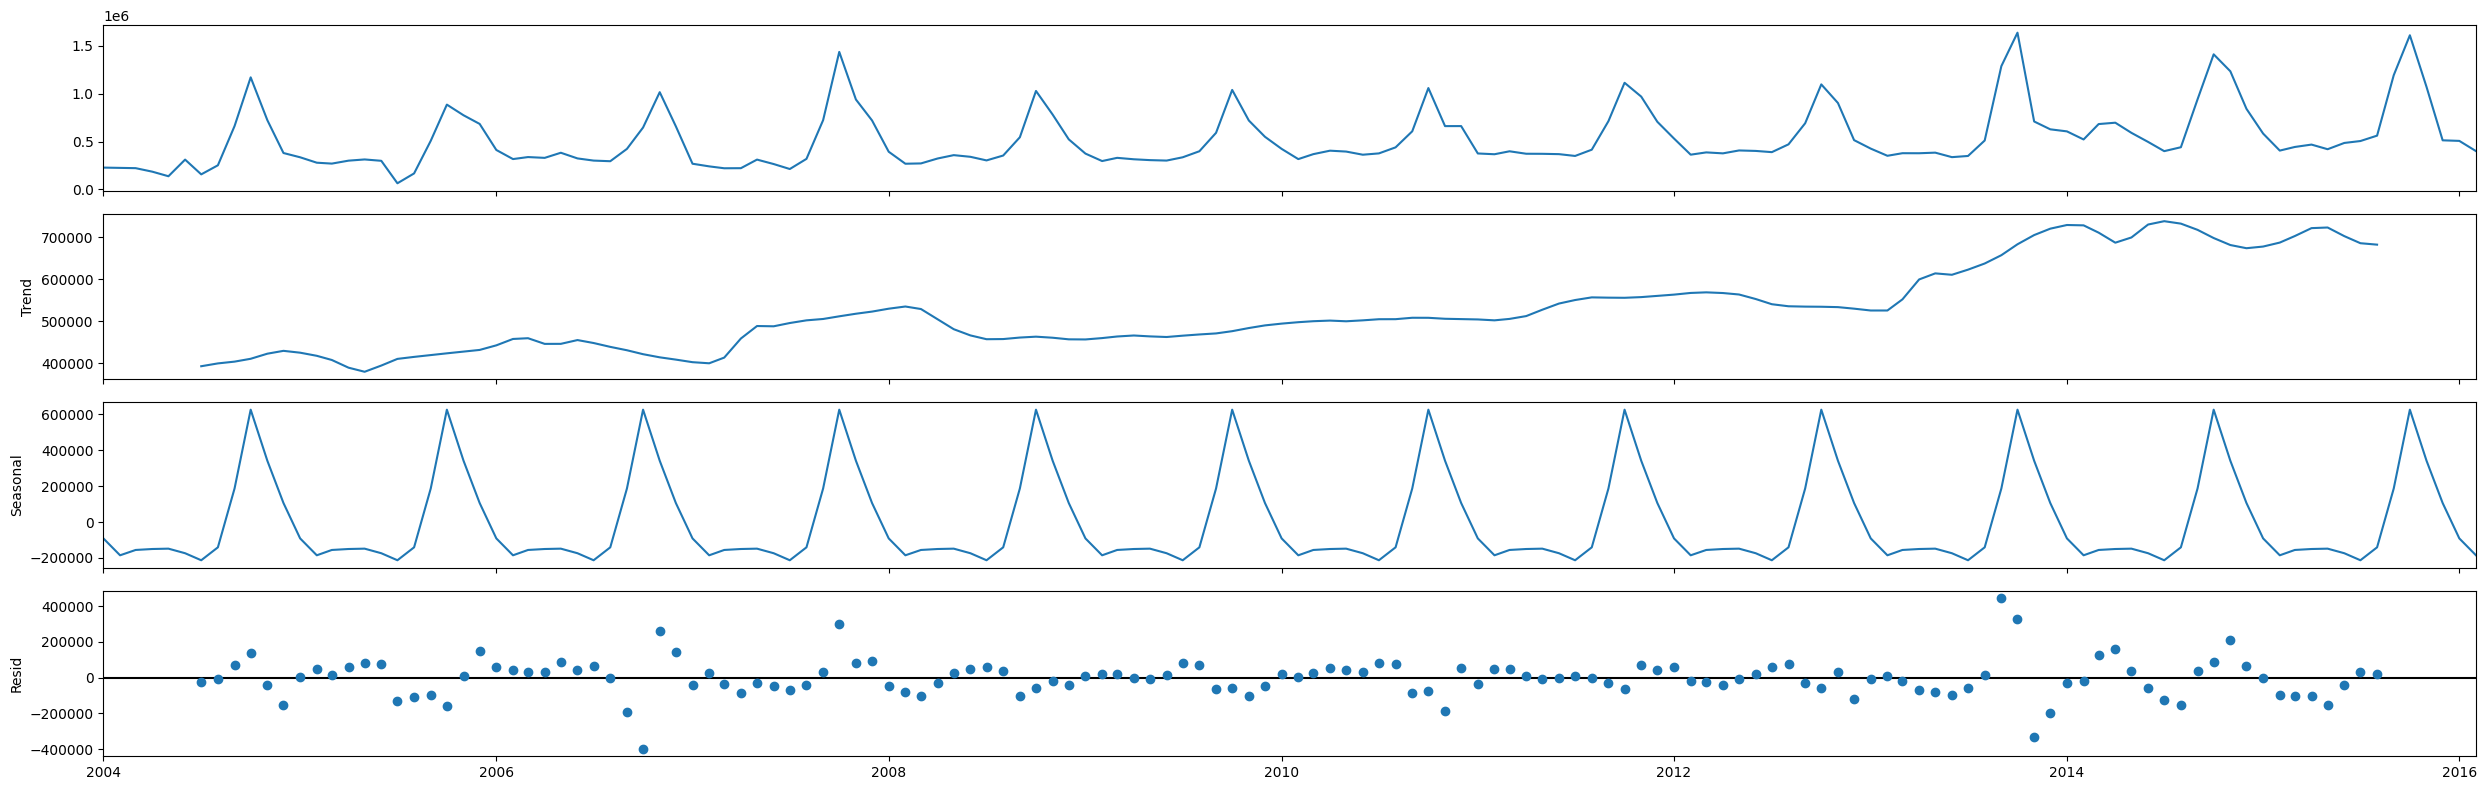

In [35]:
# statsmodels.api.tsa library with lots of methods for time series analysis
from statsmodels.api import tsa

# Get Trend, Seasonal, and Residuals components
res = tsa.seasonal_decompose(T_data, period = 12)
plt.rc("figure", figsize=(25,8))

# Convert the index to a DatetimeIndex with the appropriate frequency
res.seasonal.index = pd.DatetimeIndex(res.seasonal.index.to_timestamp())
res.trend.index = pd.DatetimeIndex(res.trend.index.to_timestamp())
res.observed.index = pd.DatetimeIndex(res.observed.index.to_timestamp())
res.resid.index = pd.DatetimeIndex(res.resid.index.to_timestamp())


resplot = res.plot()

## Time series forecasting

### Task 1. Lag features

Add the first 7 lag features (lag of 1, 2, ..., 7 months).

Drop rows containing NaNs.

In [45]:
# your code here
T_data.isna().sum()

,0
quantity,0


In [47]:
# Shift data by 1 lag
value_column = 'quantity'
T_data[value_column].shift(1)

,quantity
Timestamp,
2004-01,NaN
2004-02,227832.0
2004-03,225133.0
2004-04,221952.0
2004-05,185150.0
...,...
2015-10,1194608.0
2015-11,1612160.0
2015-12,1071872.0


In [49]:
# Add columns to the dataframe for lags from 1 to 7
for i in range(1, 8):
    T_data[f"lag_{i}"] = T_data[value_column].shift(i)
T_data.head(10)

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Timestamp,,,,,,,,
2004-01,227832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,225133,227832.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,221952,225133.0,227832.0,NaN,NaN,NaN,NaN,NaN
2004-04,185150,221952.0,225133.0,227832.0,NaN,NaN,NaN,NaN
2004-05,137390,185150.0,221952.0,225133.0,227832.0,NaN,NaN,NaN
2004-06,311445,137390.0,185150.0,221952.0,225133.0,227832.0,NaN,NaN
2004-07,157022,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,NaN
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0


In [50]:
#Drop columns with NaN
T_data.dropna(inplace=True)
T_data.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Timestamp,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0


### Task 2. Split data

Split data into train and test sets.

*   train - the first 85% of data
*   test - the last 15% of data



In [51]:
# your code here
X = T_data.drop(value_column, axis=1)
y = T_data[value_column]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train.shape, X_test.shape

((118, 7), (21, 7))

In [53]:
# Check the chronology
X_train.index.min(), X_train.index.max(), X_test.index.min(), X_test.index.max()

(Period('2004-08', 'M'),
 Period('2014-05', 'M'),
 Period('2014-06', 'M'),
 Period('2016-02', 'M'))

### Task 3. Fit Linear Regression

Train a Linear Regression model on train data and calculate $R^2$ on test data. Plot the actual and the predicted values.

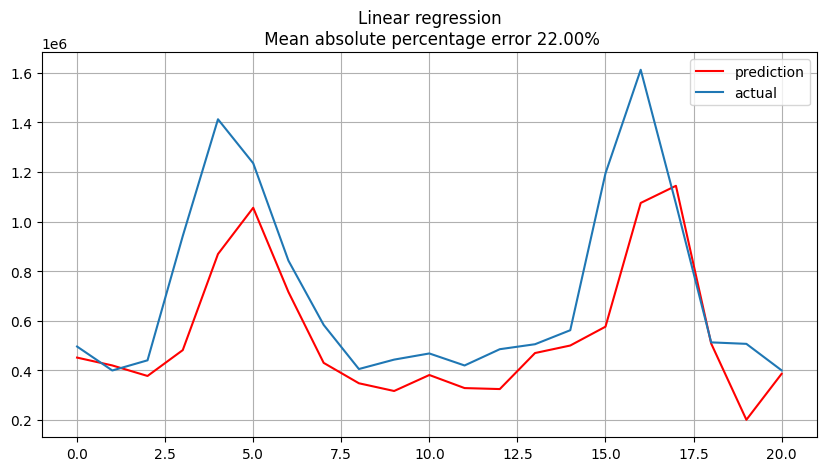

In [55]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute percentage error {mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%");

### Task 4. Aggregated features and preprocessing function

Define a preprocessing function wrapping the following steps:

1.   Split data into train and test sets with the default test_size of 15%
2.   Add lag features for a given lags range (first 7 by default)
3.   Add predefined aggregated features (monthly average)

In [56]:
def get_mean_by_cat(data, cat_feature, value_feature):
    return dict(data.groupby(cat_feature)[value_feature].mean())

In [65]:
T_data["month"] = T_data.index.month
T_data["year"] = T_data.index.year

T_data.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,month,year
Timestamp,,,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,8,2004
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,9,2004
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,10,2004
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,11,2004
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,12,2004


In [66]:
get_mean_by_cat(T_data, "month", value_column)

{1: 436629.0833333333,
 2: 344012.0,
 3: 371731.36363636365,
 4: 380720.8181818182,
 5: 385653.45454545453,
 6: 362042.2727272727,
 7: 326113.2727272727,
 8: 385456.6666666667,
 9: 741183.9166666666,
 10: 1179204.8333333333,
 11: 876030.3333333334,
 12: 615578.75}

In [67]:
get_mean_by_cat(T_data, "year", value_column)

{2004: 638146.2,
 2005: 406851.5833333333,
 2006: 453866.25,
 2007: 490306.5833333333,
 2008: 457758.4166666667,
 2009: 463326.25,
 2010: 506588.9166666667,
 2011: 543825.75,
 2012: 544752.8333333334,
 2013: 615236.8333333334,
 2014: 739207.1666666666,
 2015: 688921.6666666666,
 2016: 453791.0}

In [101]:
# your code here
def preprocess_data(data, lags_start = 1, lags_end = 8, date_cut='31.12.2014'):
  data = pd.DataFrame(data.copy())

  # add time series lags as features
  for i in range(lags_start, lags_end+1):
    data[f"lag_{i}"] = data[value_column].shift(i)

  # drop NaNs generated by adding lag features
  data.dropna(inplace=True)

  data['month'] = data.index.month
  # calculate average values only on train data to avoid data leak
  data["month_average"] = list(map(get_mean_by_cat(data.loc[:date_cut], "month", value_column).get, data.month))

  # drop features that have been used for calculating average values of the target variable
  data.drop(["month"], axis=1, inplace=True)

  # split dataset on train and test parts
  X = data.drop([value_column], axis=1)
  y = data[value_column]
  X_train = X.loc[:date_cut]
  y_train = y.loc[:date_cut]
  X_test = X.loc[date_cut:]
  y_test = y.loc[date_cut:]

  return X_train, X_test, y_train, y_test

### Task 5. Fit Linear Regression using aggregated features

Train a Linear Regression model on train data and calculate  R2  on test data. Plot the actual and the predicted values.

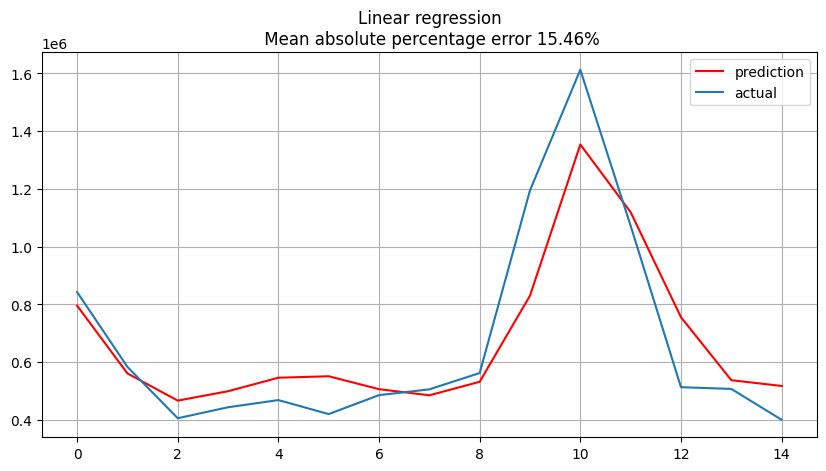

In [102]:
# your code here
X_train, X_test, y_train, y_test = preprocess_data(T_data)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute percentage error {mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%");

### Task 6. Try different lag features

Get train and test sets using `preprocess_data` for lags from 1 to 11.

Train a Linear Regression model on train data and calculate  R2  on test data. Plot the actual and the predicted values.

Lag 12: 11.86%


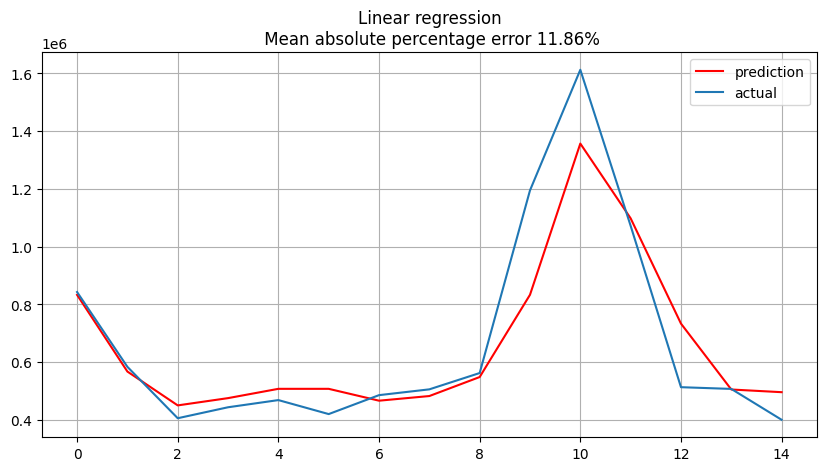

In [103]:
# your code here
for i in range(1, 13):
  X_train, X_test, y_train, y_test = preprocess_data(T_data, lags_start=i, lags_end=i+1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Lag {i}: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%")
plt.figure(figsize=(10, 5))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute percentage error {mean_absolute_percentage_error(y_test, y_pred)*100:.2f}%");
plt.show()


### Task 7. Try another regression algorithm

Check if using RandomForestRegressor improves the model quality.

Lag 12: MAPE = 24.74%


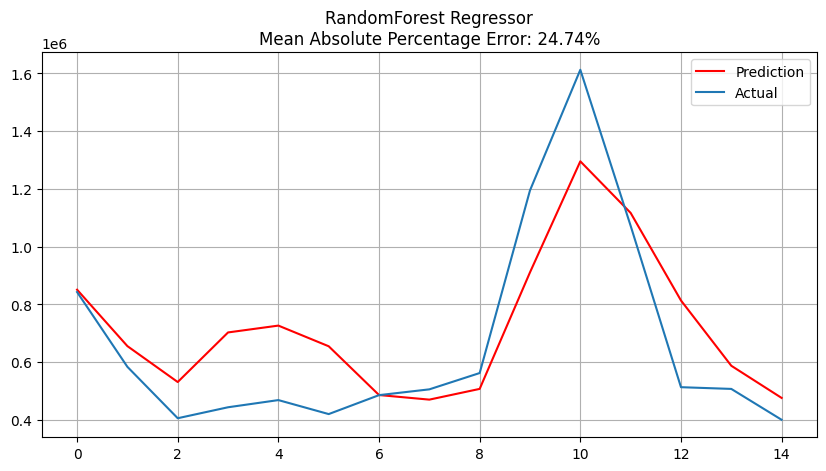

In [104]:
# your code here
from sklearn.ensemble import RandomForestRegressor

for i in range(1, 13):
  X_train, X_test, y_train, y_test = preprocess_data(T_data, lags_start=i, lags_end=i+1)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculer l'erreur MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

 # Afficher le résultat
print(f"Lag {i}: MAPE = {mape:.2f}%")

# Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.plot(y_pred, "r", label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"RandomForest Regressor\nMean Absolute Percentage Error: {mape:.2f}%")
plt.show()

### Task 8. Try to improve the model

Add `priceMod` from the source data as an aditional (exogeneous) feature.

Try other regression algorithms and hyperparameter tuning.

In [ ]:
# your code here